통계적 사고 (2판) 연습문제 ([thinkstats2.com](thinkstats2.com), [think-stat.xwmooc.org](http://think-stat.xwmooc.org))<br>
Allen Downey / 이광춘(xwMOOC)

In [1]:
from __future__ import print_function, division

import thinkstats2
import thinkplot

%matplotlib inline

## 연습문제 5.1

BRFSS 데이터셋에서 (5.4절 참조), 신장 분포는 대략 남성에 대해 모수 µ = 178 cm, σ = 7.7cm을 갖는 정규분포이며, 여성에 대해서 µ = 163 cm, σ = 7.3 cm 을 갖는다.

블루맨 그룹에 가입하기 위해서, 남성은 5’10”에서 6’1”사이여야 된다. ([http://bluemancasting.com](http://bluemancasting.com) 참조). US 남성 인구의 몇 퍼센티지가 해당 범위에 있을까? 힌트: scipy.stats.norm.cdf를 사용하라.

<tt>scipy.stats</tt> 모듈은 해석분포(analytic distributions)를 나타내는 객체를 담고 있다.

In [2]:
import scipy.stats

예를 들어, <tt>scipy.stats.norm</tt>은 정규분포를 나타낸다.

In [3]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

"고정된 확률변수(frozen random variable)"는 평균과 표준편차를 계산할 수 있다.

In [4]:
dist.mean(), dist.std()

(178.0, 7.7000000000000002)

CDF도 평가할 수 있다. 평균아래 1 표준편차를 벗어난 사람은 얼마나 될까? 약 16%

In [5]:
dist.cdf(mu-sigma)

0.15865525393145744

5'10"과 6'1" 사이 얼마나 많은 사람이 분포하고 있는가?

In [8]:
low = dist.cdf(177.8)
high = dist.cdf(185.4)
print("177.8 - 185.4 : ", dist.cdf(185.4) - dist.cdf(177.8))
# 5'10'' (177.8cm), 6'1'' (185.4cm)

177.8 - 185.4 :  0.342094682946


## 연습문제 5.2

파레토 분포에 대한 감각을 갖기 위해서, 만약 사람 신장의 분포가 파레토라면 세상이 얼마나 달라지는지 살펴보자. $x_m = 1$ m, $α = 1.7$ 모수로, 일리있는 최소값 1 m, 중위수 1.5 m 를 갖는 분포가 된다.

상기 분포를 도식화하세요. 파레토 세상에서 평균 사람 신장은 얼마인가? 인구의 얼마나 평균보다 더 적은가? 만약 파레토 세상에 70억 사람이 있다면, 얼마나 많은 사람들이 1 km 보다 더 클 것으로 예상하는가? 가장 작은 사람은 신장이 얼마나 될 것으로 예상하는가?

<tt>scipy.stats.pareto</tt>는 파레토 분포를 나타낸다. 파레토 세상에서, 사람 키 분포는 모수 $x_m = 1$ m, $α = 1.7$을 갖는다. 그래서 가장 키가 작은 사람은 100 cm이고, 중위수는 150cm이다.

In [9]:
alpha = 1.7
xmin = 1
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

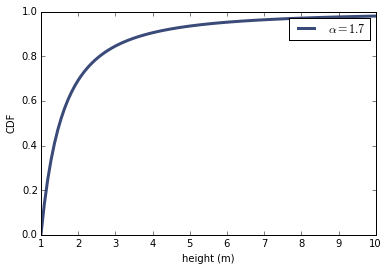

In [10]:
xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
thinkplot.Config(xlabel='height (m)', ylabel='CDF')

파레토 세상에서 평균신장이 얼마인가?

In [11]:
dist.mean()

2.4285714285714288

평균보다 더 키가 작은 사람의 비율은 얼마나 될까?

In [12]:
dist.cdf(dist.mean())

0.77873969756528805

70억 사람중에서, 1 km 보다 더 키가 클 것으로 예상되는 사람은 얼마나 될까? <tt>dist.cdf</tt> 혹은 <tt>dist.sf</tt>을 사용한다.

In [19]:
(1- dist.cdf(1000)) * 7e9 # 70억 = 7e9
dist.sf(1000) * 7e9

55602.976430479954

가장 키가 큰 사람은 얼마나 키가 클 것으로 예상되는가? 힌트: 한 사람에 대한 신장을 찾아본다.

In [28]:
dist.sf(600000) * 7e9 
# sf는 생존함수로 1-cdf 보다 더 정확하다. (http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto)

1.0525452731613427

## 연습문제 5.3

와이불 분포(Weibull distribution)는 고장 분석에서 나오는 지수분포를 일반화한 것이다 ([http://wikipedia.org/wiki/Weibull_distribution](http://wikipedia.org/wiki/Weibull_distribution) 참조). CDF는 다음과 같다.

$CDF(x) = 1 − \exp(−(x / λ)^k)$ 

와이불 분포에서 표본을 생성하고 와이블 분포를 직선처럼 보이게 만드는 변환을 사용해서 도식화하시오.

In [35]:
import random
import thinkstats2
import thinkplot

`thinkplot.Cdf` 메쏘드는 와이블 분포 CDF를 직선처럼 보이게 만드는 변환기능을 제공한다.

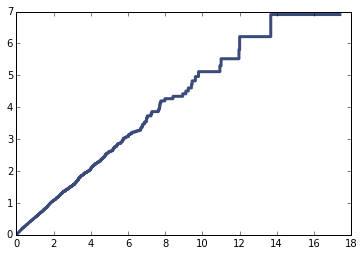

In [36]:
sample = [random.weibullvariate(2,1) for _ in range(1000)]
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf, transform='weibull')
thinkplot.Show(legend=False)

`cdf`로부터 무작위 선택을 하시오.

In [37]:
cdf.Random()

3.5674846244916778

`cdf`로부터 임의표본을 뽑으시오.

In [38]:
cdf.Sample(10)

array([ 0.3216761 ,  1.46865243,  1.95530973,  0.38741428,  0.89637778,
        0.06537907,  0.235116  ,  2.2631285 ,  2.52217699,  0.36769389])

`cdf`로부터 임의표본을 뽑고 나서, 각 값에 대한 백분위순위를 계산하시오. 그리고, 백분위순위 분포를 도식화하시오.

{'xscale': 'linear', 'yscale': 'linear'}

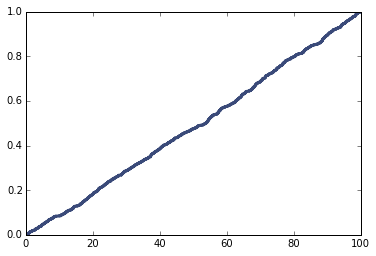

In [39]:
prs = [cdf.PercentileRank(x) for x in cdf.Sample(1000)]
pr_cdf = thinkstats2.Cdf(prs)
thinkplot.Cdf(pr_cdf)

`random.random()` 메쏘드를 사용해서 1000 개 난수를 생성하고 해당 표본 PMF를 도식화하시오.

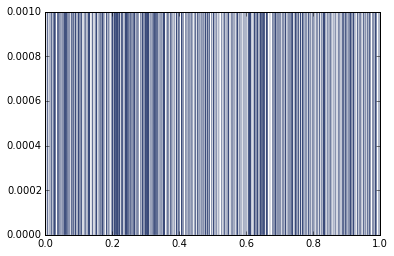

In [41]:
values = [random.random() for _ in range(1000)]
pmf = thinkstats2.Pmf(values)
thinkplot.Pmf(pmf, linewidth=0.1)

PMF가 잘 동작하지 않는다고 가정하고, 대신에 CDF 도식화를 시도한다.

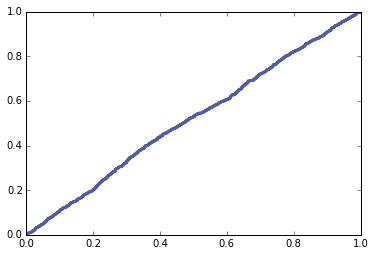

In [42]:
cdf = thinkstats2.Cdf(values)
thinkplot.Cdf(cdf)
thinkplot.Show(legend=False)

## 연습문제 5.4

`n`의 적은 값으로, 정확하게 해석 분포에 적합되는 경험분포를 기대하지 못한다. 적합 품질을 평가하는 한 방법이 해석적 분포로부터 표본을 생성하고 데이터와 얼마나 잘 매칭되는지 살펴보는 것이다.
예를 들어, 5.1 절에서, 출생사이 시간 분포를 도식화했고 근사적으로 지수분포라는 것을 보았다. 하지만, 분포는 단지 데이터가 44에 불과하다. 데이터가 지수분포에서 나왔는지 살펴보기 위해서, 출생사이 약 33분인, 데이터와 동일한 평균을 갖는 지수분포에서 데이터를 44개 생성한다.

임의 확률 표본의 분포를 도식화하고, 실제 분포와 비교한다. `random.expovariate` 을 사용해서 값을 생성한다.

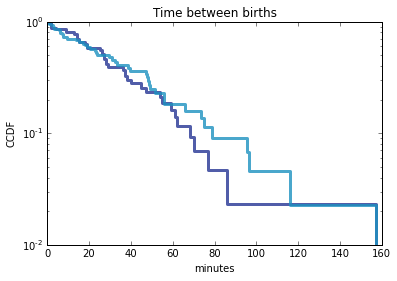

In [47]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

n = len(diffs)
Iam = 44.0 / 24 / 60
sample = [random.expovariate(Iam) for _ in range(n)]
model = thinkstats2.Cdf(sample, label='model')

thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf,model], complement=True)
thinkplot.Show(title='Time between births',
                xlabel='minutes',
                ylabel='CCDF',
                yscale='log')

## 연습문제 5.5

`mystery.py` 코드는 임의 데이터 파일을 생성한다.

In [53]:
from mystery import *

funcs = [uniform_sample, triangular_sample, expo_sample,
             gauss_sample, lognorm_sample, pareto_sample,
             weibull_sample, gumbel_sample]

for i in range(len(funcs)):
    sample = funcs[i](1000)
    filename = 'mystery%d.dat' % i
    print(filename, funcs[i].__name__)

mystery0.dat uniform_sample
mystery1.dat triangular_sample
mystery2.dat expo_sample
mystery3.dat gauss_sample
mystery4.dat lognorm_sample
mystery5.dat pareto_sample
mystery6.dat weibull_sample
mystery7.dat gumbel_sample
